In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

path = '/content/company_sales_data.csv'
df = pd.read_csv(path)
df.head()

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,171100
1,2,2630,1200,5100,6100,2100,1200,18330,164022
2,3,2140,1340,4550,9550,3550,1340,22470,216293
3,4,3400,1130,5870,8870,1870,1130,22270,214564
4,5,3600,1740,4560,7760,1560,1740,20960,217212


In [2]:
df.shape

(36, 9)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   month_number  36 non-null     int64
 1   facecream     36 non-null     int64
 2   facewash      36 non-null     int64
 3   toothpaste    36 non-null     int64
 4   bathingsoap   36 non-null     int64
 5   shampoo       36 non-null     int64
 6   moisturizer   36 non-null     int64
 7   total_units   36 non-null     int64
 8   total_profit  36 non-null     int64
dtypes: int64(9)
memory usage: 2.7 KB


Given 36 full row-months (i.e. no gaps)

* Plot the dynamics of the company's sales (column *'total_profit'*) in the form of a regular line graph.

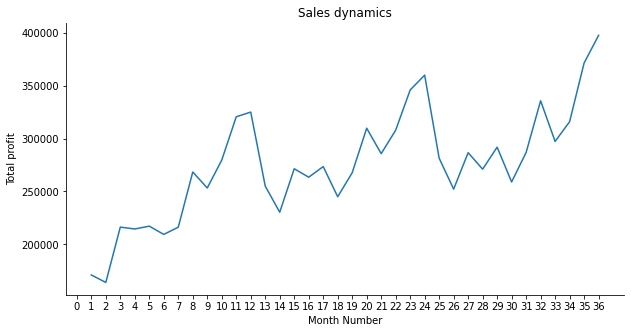

In [4]:
fig, ax = plt.subplots(figsize=(10, 5))
g = sns.lineplot(data=df, 
                 x='month_number', 
                 y='total_profit')
g.set(xlabel='Month Number', 
      ylabel='Total profit',
      title='Sales dynamics')
plt.xticks(np.arange(0, 37), rotation=0)   # numbers of month to show on x-axes label
sns.despine()
plt.show()

Conclusion:
* Recessions in periods: 12-14, 24-26 (winter).
* In general, the profit increases every year.

/usr/local/lib/python3.8/dist-packages/seaborn/relational.py:514: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/usr/local/lib/python3.8/dist-packages/seaborn/relational.py:529: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


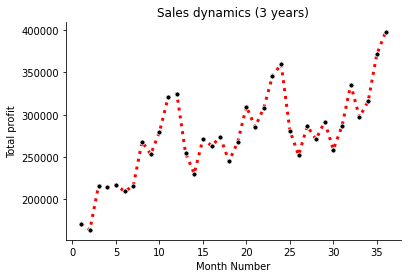

In [5]:
# Change some parameters of the previous graph.

g = sns.lineplot(data=df, x='month_number', y='total_profit', 
                 ls=':', lw=3, c='r',        
                 marker='o', mfc='k', ms=5) 
g.set(xlabel='Month Number', 
      ylabel='Total profit',
      title='Sales dynamics (3 years)')
sns.despine()
plt.show()

---
Draw on one graph (in one coordinate system) the dynamics of sales of each type of product. In the legend, indicate the name of the corresponding product type.

In [6]:
df.columns

Index(['month_number', 'facecream', 'facewash', 'toothpaste', 'bathingsoap',
       'shampoo', 'moisturizer', 'total_units', 'total_profit'],
      dtype='object')

In [7]:
df.iloc[:, 1:7].head(3) # only these columns (1-7) will be plotted 

,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer
0,2500,1500,5200,9200,1200,1500
1,2630,1200,5100,6100,2100,1200
2,2140,1340,4550,9550,3550,1340


In [8]:
cols = ['facecream', 'facewash', 'toothpaste', 'bathingsoap', 'shampoo', 'moisturizer']

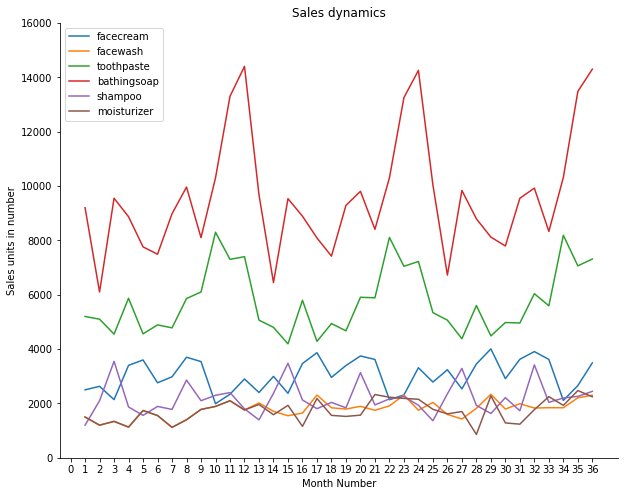

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))
for col in cols:    
  sns.lineplot(data=df, 
               x='month_number',
               y=col,
               label=col)

ax.set(xlabel='Month Number', 
       ylabel='Sales units in number',
       title='Sales dynamics',
       ylim=(0,16000))

plt.xticks(np.arange(0, 37))   # numbers of month to show on x-axes label
plt.legend(loc='upper left')
sns.despine()
plt.show()

Conclusion:
* In 12th month there was a sharp decline in sales of *bathingsoap*. Having reached the peak, sales for 2 months decreased by about 2 times. At the same time, the product remains in the top-1 in sales during the entire period.
* The 2nd place in sales is occupied by toothpaste with similar behavior (growth - fall - gradual increase).
* The least traded items are *moisturizer* and *facewash*.

Showing data for the first year

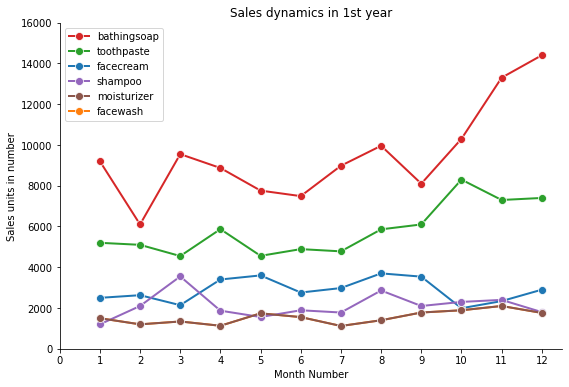

In [10]:
fig, ax = plt.subplots(figsize=(9,6))
for col in cols:    
    sns.lineplot(data=df.iloc[:12, :], 
                x='month_number',
                y=col,
                label=col,
                linewidth=2,
                marker='o',
                ms=8)

ax.set(xlabel='Month Number', 
       ylabel='Sales units in number',
       title='Sales dynamics in 1st year',
       xlim=(0, 12.5),
       ylim=(0,16000))

plt.xticks(np.arange(0, 13))  # numbers of month to show on x-axes label

# sort legend
# get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# specify order of elements in legend
order = [3, 2, 0, 4, 5, 1] # col's indexes

plt.legend([handles[i] for i in order], [labels[i] for i in order], loc='upper left') 
sns.despine()
plt.show()

Conclusion:
* Sales of *bathingsoap* remained the highest throughout the entire period (1 year).
* In second place in terms of sales was *toothpaste*.
* Least of all produced: *moisturizer*.

The question arises: where is the face wash?

Looking at the original data table, we see that the values of the facewash and moisturizer columns are exactly the same. Therefore, the graphs overlap each other in the period from 1 to 12 months.

---
Plot a scatter plot to show the ratio of *bathingsoap* to *shampoo* sales.

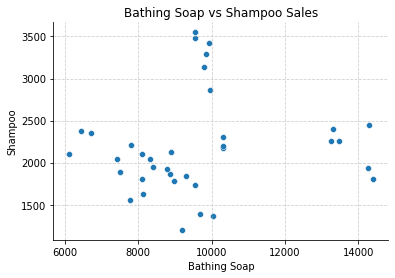

In [11]:
g = sns.scatterplot(data=df, x='bathingsoap', y='shampoo')
g.set(xlabel='Bathing Soap',
      ylabel='Shampoo',
      title='Bathing Soap vs Shampoo Sales')
plt.grid(linestyle='--', alpha=0.6)
sns.despine()
plt.show()

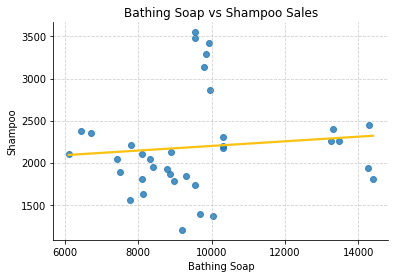

In [12]:
g = sns.regplot(data=df, x='bathingsoap', y='shampoo', line_kws={'color':'#FAC213'}, ci=None)
plt.grid(linestyle='--', alpha=0.6)
g.set(xlabel='Bathing Soap',
      ylabel='Shampoo',
      title='Bathing Soap vs Shampoo Sales')
sns.despine()
plt.show()

In [13]:
print('Pearson correlation coefficient:', np.round(df['bathingsoap'].corr(df['shampoo']), 3))

Pearson correlation coefficient: 0.103


Conclusion: The correlation is weak.

---
Build a bar chart to compare sales of cream for *facecream* and *facewash* by month.

In [14]:
df_1_year = df.iloc[:12, :]
df_1_year

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,171100
1,2,2630,1200,5100,6100,2100,1200,18330,164022
2,3,2140,1340,4550,9550,3550,1340,22470,216293
3,4,3400,1130,5870,8870,1870,1130,22270,214564
4,5,3600,1740,4560,7760,1560,1740,20960,217212
5,6,2760,1555,4890,7490,1890,1555,20140,209425
6,7,2980,1120,4780,8980,1780,1120,20760,216259
7,8,3700,1400,5860,9960,2860,1400,25180,268405
8,9,3540,1780,6100,8100,2100,1780,23400,253302
9,10,1990,1890,8300,10300,2300,1890,26670,279659


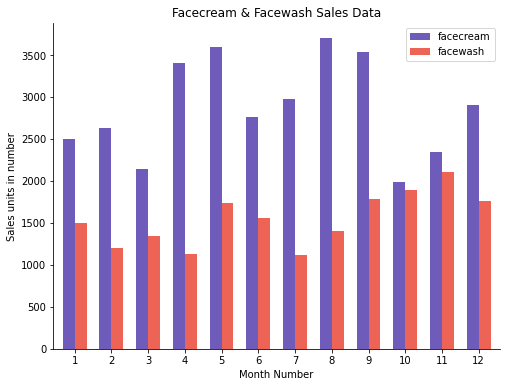

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))
g = df_1_year.plot(x='month_number', 
                   y=['facecream', 'facewash'],                   
                   kind='bar',                   
                   color=['#6E5BBA', '#ED6355'],
                   width=0.65,
                   ax=ax)

g.set(xlabel='Month Number',
      ylabel='Sales units in number',
      title='Facecream & Facewash Sales Data')
plt.xticks(rotation=0)
#plt.grid(linestyle='--', alpha=0.5)
sns.despine()
plt.show()

Conclusion:
Cream is always sold more. Usually almost 2 times more, except for October (month 10) and November (month 11), when *facecream* and *facewash* have almost the same sales.

---
Calculate the share of sales of each type of product in the total number of products sold for the year.

$ Д = \frac{Q_н }{Q_о} \cdot 100\% $

In [16]:
df_1_year.head(3)

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,171100
1,2,2630,1200,5100,6100,2100,1200,18330,164022
2,3,2140,1340,4550,9550,3550,1340,22470,216293


In [17]:
df_1_year_units = df_1_year.iloc[:, 1:7]
df_1_year_units.head(2)

,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer
0,2500,1500,5200,9200,1200,1500
1,2630,1200,5100,6100,2100,1200


In [18]:
# total profit of each unit sold in 1 year
units_profits_1_year = df_1_year_units.sum(axis=0) 
units_profits_1_year

facecream       34480
facewash        18515
toothpaste      69910
bathingsoap    114010
shampoo         25410
moisturizer     18515
dtype: int64

In [19]:
# total profit of everything sold in 1 year
total_units_profit_1_year = units_profits_1_year.sum()
total_units_profit_1_year

280840

In [20]:
sales_share = np.round(units_profits_1_year / total_units_profit_1_year, 2).sort_values(ascending=False)
sales_share

bathingsoap    0.41
toothpaste     0.25
facecream      0.12
shampoo        0.09
facewash       0.07
moisturizer    0.07
dtype: float64

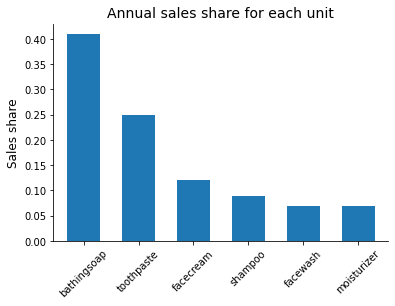

In [21]:
# Plot a graph based on the received data.

sales_share.plot(kind='bar', width=0.6, rot=45)
plt.ylabel('Sales share', fontsize=12)
plt.title('Annual sales share for each unit', fontsize=14)
sns.despine()
plt.show()

Conclusion:
* Biggest sales - *bathing soap*.
* Almost two times less - *toothpaste*.
* Almost half as much - *face cream*. A little less - *shampoo*.
* *Facewash* and *moisturizer* - equally the least.

The second visualization option, which should not be used due to the large number of features. 

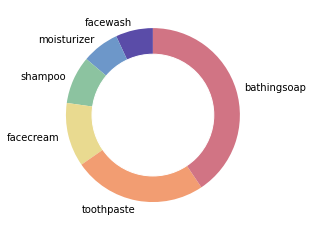

In [22]:
white_circle = plt.Circle((0,0), 0.7, color='white')
plt.pie(sales_share.sort_values(ascending=True), 
        labels=sales_share.sort_values(ascending=True).index, 
        startangle=90,
        colors=['#5A4CA8', '#6D97C9', '#8CC3A0', \
                '#E9DA90', '#F29D72', '#D17484'])
plt.gcf().gca().add_artist(white_circle)
plt.show()

---
Display on two adjacent graphs (with a common axis Ox) the number of units sold (total_units) and the dynamics of income (total_profit) over 12 months.

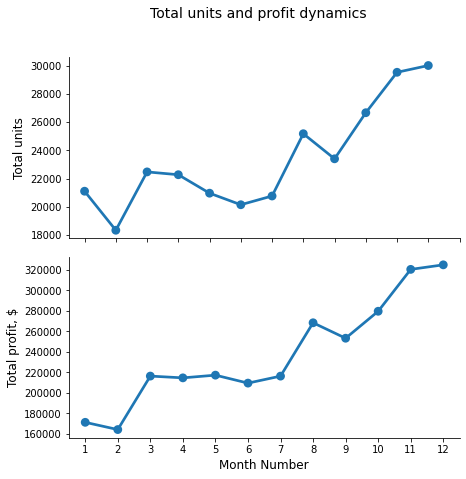

In [23]:
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, 
                               sharex=True, figsize=(7,7))

sns.pointplot(data=df_1_year,
              x='month_number', 
              y='total_units', 
              ax=ax0)

sns.pointplot(data=df_1_year,
              x='month_number', 
              y='total_profit',
              ax=ax1)

# decrease vertical gap between subplots
plt.subplots_adjust(hspace=.1)

ax0.set_xticks(np.arange(0, 13))
ax0.set_xlabel(' ')
ax0.set_ylabel('Total units', fontsize=12)

ax1.set_xlabel('Month Number', fontsize=12)
ax1.set_ylabel('Total profit, $', fontsize=12)
plt.suptitle('Total units and profit dynamics', fontsize=14)

sns.despine()
plt.show()

Conclusion: The number of units sold and revenue grow proportionally. From 3 to 6 months they sold less, but did not lose money. It means that the cost of a unit of goods has increased.

---
See the dynamics of sales (number of units and total profit) not by months, but by quarters.

In [24]:
df_1_year

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,171100
1,2,2630,1200,5100,6100,2100,1200,18330,164022
2,3,2140,1340,4550,9550,3550,1340,22470,216293
3,4,3400,1130,5870,8870,1870,1130,22270,214564
4,5,3600,1740,4560,7760,1560,1740,20960,217212
5,6,2760,1555,4890,7490,1890,1555,20140,209425
6,7,2980,1120,4780,8980,1780,1120,20760,216259
7,8,3700,1400,5860,9960,2860,1400,25180,268405
8,9,3540,1780,6100,8100,2100,1780,23400,253302
9,10,1990,1890,8300,10300,2300,1890,26670,279659


* 1 quarter - months № 1, 2, 3 
* 2 quarter - months № 4, 5, 6 
* 3 quarter - months № 7, 8, 9 
* 4 quarter - months № 10, 11, 12

Let's create a new dataframe of four quarters (number of units and total profit); a quarter is the sum of three months

In [25]:
q1_tunits = df_1_year.iloc[0:3, 7].sum()
q2_tunits = df_1_year.iloc[3:6, 7].sum()
q3_tunits = df_1_year.iloc[6:9, 7].sum()
q4_tunits = df_1_year.iloc[9:12, 7].sum()

q1_tprofit = df_1_year.iloc[0:3, 8].sum()
q2_tprofit = df_1_year.iloc[3:6, 8].sum()
q3_tprofit = df_1_year.iloc[6:9, 8].sum()
q4_tprofit = df_1_year.iloc[9:12, 8].sum()

In [26]:
tunits_dict = {'Q1': q1_tunits,
               'Q2': q2_tunits,
               'Q3': q3_tunits,
               'Q4': q4_tunits}
tunits = pd.Series(tunits_dict)
tunits

Q1    61900
Q2    63370
Q3    69340
Q4    86230
dtype: int64

In [27]:
tprofit_dict = {'Q1': q1_tprofit,
                'Q2': q2_tprofit,
                'Q3': q3_tprofit,
                'Q4': q4_tprofit}
tprofit = pd.Series(tprofit_dict)
tprofit

Q1    551415
Q2    641201
Q3    737966
Q4    925293
dtype: int64

In [28]:
df_1_year_quarters = pd.DataFrame({'total_units': tunits,
                                   'total_profit': tprofit})
df_1_year_quarters

,total_units,total_profit
Q1,61900,551415
Q2,63370,641201
Q3,69340,737966
Q4,86230,925293


Various visualizations 

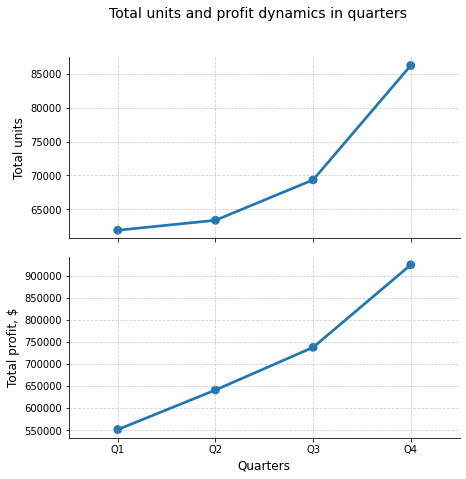

In [29]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, 
                               sharex=True, figsize=(7,7))

sns.pointplot(data=df_1_year_quarters,
              x=df_1_year_quarters.index,
              y='total_units', 
              ax=ax1)
sns.pointplot(data=df_1_year_quarters,
              x=df_1_year_quarters.index,
              y='total_profit', 
              ax=ax2)

plt.subplots_adjust(hspace=.1)
ax1.set_ylabel('Total units', fontsize=12)
ax2.set_ylabel('Total profit, $', fontsize=12)
plt.xlabel('Quarters', fontsize=12)
plt.xticks(np.arange(0, 4))
plt.suptitle('Total units and profit dynamics in quarters', fontsize=14)

ax1.grid(linestyle='--', alpha=0.6)
ax2.grid(linestyle='--', alpha=0.6)
sns.despine()
plt.show()

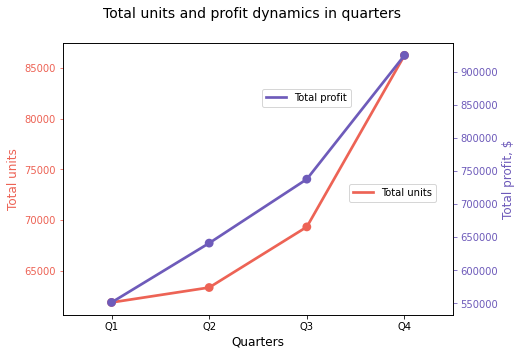

In [30]:
fig, ax1 = plt.subplots(figsize=(7,5))
ax2 = ax1.twinx()

sns.pointplot(data=df_1_year_quarters,
              x=df_1_year_quarters.index,
              y='total_units',
              color='#ED6355', 
              label='Total units',
              ax=ax1)

sns.pointplot(data=df_1_year_quarters,
              x=df_1_year_quarters.index,
              y='total_profit',
              color='#6E5BBA', 
              label='Total profit',
              ax=ax2)
ax1.set_xlabel('Quarters', fontsize=12)
ax1.set_ylabel('Total units', color='#ED6355', fontsize=12)
ax1.tick_params(axis='y', colors='#ED6355')
ax1.legend(labels=['Total units'], bbox_to_anchor=(0.72, 0.5))

ax2.set_ylabel('Total profit, $', color='#6E5BBA', fontsize=12)
ax2.tick_params(axis='y', colors='#6E5BBA')
ax2.legend(labels=['Total profit'], bbox_to_anchor=(0.75, 0.85))

plt.suptitle('Total units and profit dynamics in quarters', fontsize=14)
plt.show()

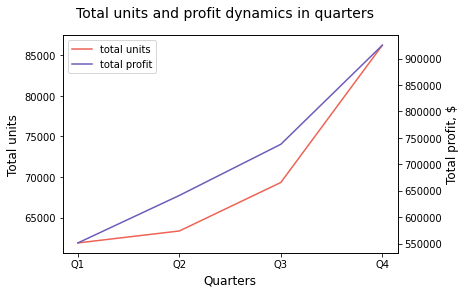

In [31]:
g1 = sns.lineplot(data=df_1_year_quarters['total_units'], 
                  color='#ED6355', 
                  label='total units')
g2 = sns.lineplot(data=df_1_year_quarters['total_profit'], 
                  ax=g1.axes.twinx(), 
                  color='#6E5BBA',                   
                  label='total profit')

h1, l1 = g1.get_legend_handles_labels()
h2, l2 = g2.get_legend_handles_labels()

# merge two legends
g1.legend(h1+h2, l1+l2)

# remove the second legend
g2.get_legend().remove()

g1.set_xlabel('Quarters', fontsize=12)
g1.set_ylabel('Total units', fontsize=12)
g2.set_ylabel('Total profit, $', fontsize=12)
plt.suptitle('Total units and profit dynamics in quarters', fontsize=14)
plt.show()

Conclusion: Sales and revenues are growing every quarter. Rapid growth is observed in the 4th quarter. In 2nd quarter, sales grew slightly, while revenue increased linearly.